  # Prosjektoppgave PY1010
  ## Levert av Kristine Moe, 20250411

  ## Del a)

  ### Lese inn et Excel-dokument og lagre dataene i hver kolonne i arrayer


In [374]:
import numpy as np
import pandas as pd

  # Henter Excel-dokumentet:
data = pd.read_excel('support_uke_24.xlsx')

  # Legger inn verdiene for kolonne 1-4:
u_dag = data['Ukedag'].values  
kl_slett = data['Klokkeslett'].values 
varighet = data['Varighet'].values 
score = data['Tilfredshet'].values 


## Del b)

### Finne antall henvendelser for hver ukedag

Text(0.5, 1.0, 'Antall henvendelser pr. ukedag')

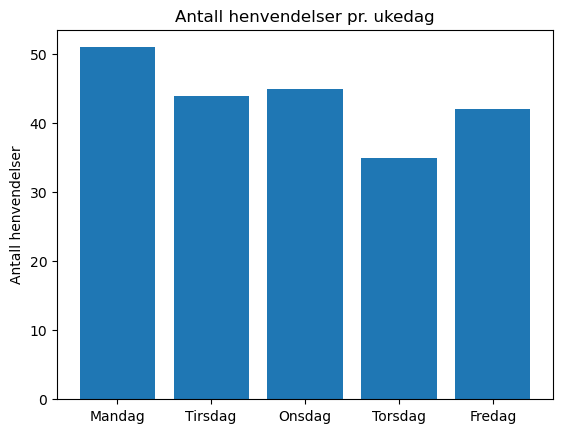

In [392]:
import pandas as pd
import matplotlib.pyplot as plt

  # Konverterer arrayen data til Pandas DataFrame
df = pd.DataFrame(data)

  # Teller antall forekomster av hver ukedag 
antall_henvendelser = df['Ukedag'].value_counts()

  # Definerer rekkefølgen av ukedagene
ukedager_rekkefolge = ['Mandag', 'Tirsdag', 'Onsdag', 'Torsdag', 'Fredag']

  # Sorterer etter den definerte rekkefølgen
antall_henvendelser = antall_henvendelser.reindex(ukedager_rekkefolge)

  # Plotter antall forekomster som også gir antall henvendelser, i et søylediagram
plt.bar(antall_henvendelser.index, antall_henvendelser)
plt.ylabel('Antall henvendelser')
plt.title('Antall henvendelser pr. ukedag')

  ## Del c)
  ### Finne minste og lengste loggførte samtaletider i uke 24

In [378]:
  # Bruker 'varighet' fra Del A og finner kortest og lengst tid ved å bruke min og max:
kortest_varighet = min(varighet)
lengst_varighet = max(varighet)

  # Skriver ut resultatet:
print('Minste samtaletid er', kortest_varighet)
print('Lengste samtaletid er', lengst_varighet)

Minste samtaletid er 00:00:59
Lengste samtaletid er 00:11:28


  ## Del d)
  ### Regne ut gjennomsnittlig samtaletid basert på alle henvendelser i uke 24

In [380]:
  # Konverterer tid fra formatet HH:MM:SS til sekunder:
def tid_til_sekunder(tid):
    h, m, s = map(int, tid.split(':'))
    return h * 3600 + m * 60 + s
  
  # Konverter alle elementer til sekunder:
varighet_i_sekunder = [tid_til_sekunder(tid) for tid in varighet]

  # Beregner gjennomsnitlig samtaletid:
gj_snitt = np.mean(varighet_i_sekunder)

  # Runder av til nærmeste hele sekund og minutt og skriver ut resultatet:
print('Gjennomsnittlig samtaletid i uke 24 er', round(gj_snitt), 'sekunder eller', round(gj_snitt/60), 'minutter')


Gjennomsnittlig samtaletid i uke 24 er 400 sekunder eller 7 minutter


  ## Del e)
  ### Finne totalt antall henvendelser for hver av tidsrommene 08-10, 10-12, 12-14 og 14-16 for uke 24

Text(0.5, 1.0, 'Antall henvendelser pr. tidsrom for uke 24')

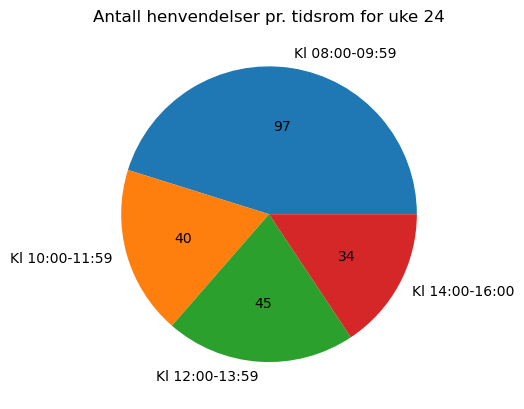

In [382]:
  # Konverterer kolonnen 'Klokkeslett' til datetime og spesifiserer formatet:
df['Klokkeslett'] = pd.to_datetime(df['Klokkeslett'], format='%H:%M:%S')

  # Henter tidspunktene fra kolonnen 'Klokkeslett:
tidspunkt = df['Klokkeslett'].dt.hour

  # Teller antall henvendelser i tidsrommene:
atte_ti = np.count_nonzero((tidspunkt >= 8) & (tidspunkt < 10))
ti_tolv = np.count_nonzero((tidspunkt >= 10) & (tidspunkt < 12))
tolv_fjorten = np.count_nonzero((tidspunkt >= 12) & (tidspunkt < 14))
fjorten_seksten = np.count_nonzero((tidspunkt >= 14) & (tidspunkt <= 16))

  # Registrerer data til sektordiagrammet:
sizes = [atte_ti, ti_tolv, tolv_fjorten, fjorten_seksten]
labels = ['Kl 08:00-09:59', 'Kl 10:00-11:59', 'Kl 12:00-13:59', 'Kl 14:00-16:00']

  # Plotter sektordiagrammet og bruker en lambda-funksjon til å beregne og formatere antall:
plt.pie(sizes, labels = labels, autopct = lambda p: str(int(p * sum(sizes) / 100)))
plt.title('Antall henvendelser pr. tidsrom for uke 24')

  ## Del f)
  ### Regne ut MORSEs supportavdelings Net Promoter Score (NPS)

In [384]:
  # Definerer funksjonen NPS(scores): 
def NPS(scores):
      # Filtrerer ut ikke-numeriske verdier for å utelate kunder som ikke har gitt tilbakemelding:
    numeric_scores = [s for s in scores if isinstance(s, (int, float))]
      # Summerer verdiene fra svarene med score 1-6:
    detractors = sum(1 for s in numeric_scores if s <= 6)
      # Summerer verdiene fra svarene med score 9-10:
    promoters = sum(1 for s in numeric_scores if s >= 9)
      # Summerer total score fra alle svarene:
    total_responses = sum(1 for s in numeric_scores if s <= 10)
      # Beregner NPS-verdien ved å trekke scoren fra de positive kundene fra scoren 
      # fra de negative kundene og dele på total score fra alle svarene, inkl. de nøytrale:
    nps_score = ((promoters - detractors) / total_responses) * 100
    return nps_score

  # Skriver ut NPS avrundet til heltall:
print('Net Promoter Score er', round(NPS(score)))

Net Promoter Score er 42
